In [2]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Import and read the healthcare-dataset-stroke-data.csv.
import pandas as pd 
cvd_df = pd.read_csv("C:/Users/Aline/OneDrive/Desktop/Boot Camp/Project 4/heart_cleaned.csv")
cvd_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Group
0,0,3,0,0,0,0,0,0,1,1,14.54,1,0.0,30.0,16.0,12.0,4
1,3,4,0,1,0,0,0,1,0,1,28.29,0,0.0,30.0,0.0,4.0,4
2,3,4,1,0,0,0,0,1,0,1,33.47,0,4.0,12.0,3.0,16.0,3
3,0,4,1,1,0,0,0,1,0,0,28.73,0,0.0,30.0,30.0,8.0,4
4,2,4,0,0,0,0,0,0,0,0,24.37,1,0.0,8.0,4.0,0.0,4


## **EDA & Preprocessing**


In [3]:
# Examine the info for the dataframe
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  BMI                           308854 non-null  float64
 11  Smoking_History               308854 non-null  int64  
 12  Alcohol_Consumption           308854 non-nul

In [4]:
# Examine the total NaN values for each column
cvd_df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Age_Group                       0
dtype: int64

In [5]:
# Create a series of average BMI for each age
avg_bmi_by_age = cvd_df.groupby('Age_Group')['BMI'].mean()
avg_bmi_by_age

Age_Group
0    26.005244
1    28.585826
2    29.697715
3    29.151087
4    27.672867
Name: BMI, dtype: float64

In [6]:
# Replace NaN values in the "bmi" column with the average BMI of the corresponding age
def replace_bmi(row):
    if pd.isna(row['BMI']):
        return avg_bmi_by_age[row['Age_Group']]
    else:
        return row['BMI']

cvd_df['BMI'] = cvd_df.apply(replace_bmi, axis=1)

In [7]:
# Check the info of the dataframe (if the NaN values in the 'bmi' column are replaced)
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  BMI                           308854 non-null  float64
 11  Smoking_History               308854 non-null  int64  
 12  Alcohol_Consumption           308854 non-nul

In [8]:
# Determine the number of unique values in each column.
cvd_df.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
Age_Group                          5
dtype: int64

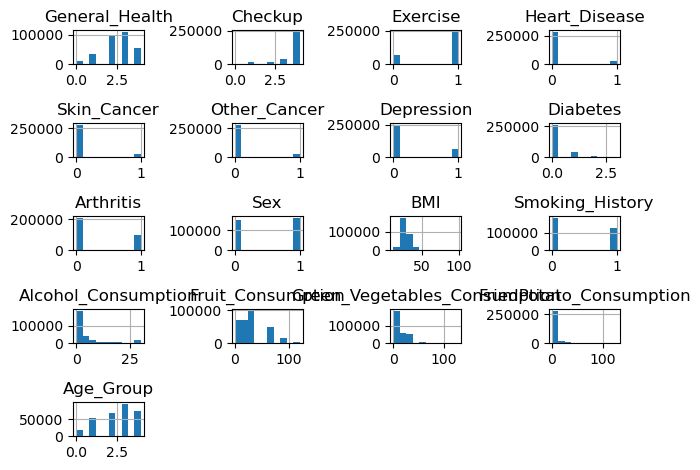

In [9]:
# Examine Data Distribution on numerical columns
cvd_df.hist()
plt.tight_layout()

In [10]:
# Look at the stroke outcome value counts
cvd_counts = cvd_df['Heart_Disease'].value_counts()
cvd_counts

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Outcome Distribution')

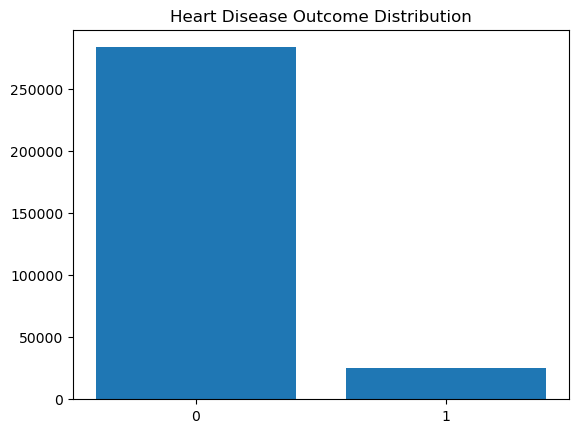

In [11]:
# Examine the distribution of stroke column
plt.bar(x = cvd_counts.index, height = cvd_counts, tick_label = ['0', '1'])
plt.title('Heart Disease Outcome Distribution')

In [12]:
# Split the data into X and y
y = cvd_df['Heart_Disease']
X = cvd_df.drop(columns=['Heart_Disease'])

In [13]:
# Import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [16]:
# Perform oversampling with SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_encoded, y)

In [17]:
# Convert categorical data to numeric with `pd.get_dummies` (only on X, bc y is already 0s and 1s)
X_encoded = pd.get_dummies(X)

In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_smote)

In [19]:
# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=1)

## **Train and Evaluate the Model**

### **Train model on resampled data using `SMOTE`**

In [20]:
# Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [21]:
# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=1)

In [22]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [23]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

In [24]:
# Evaluate the model with Confusion Matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)

In [25]:
# Generate a confusion matrix for the model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,51753,5069
Actual 1,3962,52770


In [26]:
# Look at the accuracy score 
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9204695563344312


In [27]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56822
           1       0.91      0.93      0.92     56732

    accuracy                           0.92    113554
   macro avg       0.92      0.92      0.92    113554
weighted avg       0.92      0.92      0.92    113554



**Evaluation:** For this optimization, `SMOTE` was used to oversample the data, which resulted in an overall accuracy score of 92.05% when predicting both class `0` and `1`. Compared to the initial model that used `RandomOverSampler` for oversampling, the overall accuracy decreased.